<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Занятие 3. Обучение с учителем. Методы классификации
## <center>Часть 2. Дерево решений в задачах классификации и регрессии

### Что такое дерево решений

Начнем обзор методов классификации, конечно же, с самого популярного - дерева решений. 
Деревья решений используются в повседневной жизни в самых разных областях человеческой деятельности, порой и очень далеких от машинного обучения. Деревом решений можно назвать наглядную инструкцию, что делать в какой ситуации. Приведем пример из области консультирования научных сотрудников института. Высшая Школа Экономики выпускает инфо-схемы, облегчающие жизнь своим сотрудникам. Вот фрагмент инструкции по публикации научной статьи на портале института. 

<img src="../../img/decision_tree1.png">

В терминах машинного обучения можно сказать, что это элементарный классификатор, который определяет форму публикации на портале (книга, статья, глава книги, препринт, публикация в "НИУ ВШЭ и СМИ") по нескольким признакам - типу публикации (монография, брошюра, статья и т.д.), типу издания, где опубликована статья (научный журнал, сборник трудов и т.д.) и остальным. 

Зачастую дерево решений служит обобщением опыта экспертов, средством передачи знаний будущим сотрудникам или моделью бизнес-процесса компании. Например, до внедрения масштабируемых алгоритмов машинного обучения в банковской сфере задача кредитного скоринга решалась экспертами. Решение о выдаче кредита заемщику принималось на основе некоторых интуитивно (или по опыту) выведенных правил, которые можно представить в виде дерева решений. 

<img src="../../img/decision_tree2.gif">

В этом случае можно сказать, что решается задача бинарной классификации (целевой класс имеет два значения - "Выдать кредит" и "Отказать") по признакам "Возраст", "Наличие дома", "Доход" и "Образование". 

Дерево решений как алгоритм машинного обучения по сути - то же самое, объединение логических правил вида "Значение признака a меньше x И Значение признака b меньше y ... => Класс 1" в структуру данных "Дерево". 
Огромное преимущество деревьев решений в том, что они легко интерпретируемы, понятны человеку. Например, по схеме на рисунке 2 можно объяснить заемщику, почему ему было отказано в кредите. Например, потому что у него нет дома и доход меньше 5000. Как мы увидим дальше, многие другие, хоть и более точные, модели не обладают этим свойством и могут рассматриваться скорее как "черный ящик", в который загрузили данные и получили ответ. В связи с этой "понятностью" деревьев решений и их сходством с моделью принятия решений человеком (можно легко объяснять боссу свою модель), деревья решений получили огромную популярность, а один из представителей этой группы методов классификации, С4.5, рассматривается первым в списке 10 лучших алгоритмов интеллектуального анализа данных (Top 10 algorithms in data mining, 2007). 

### Дерево решений, построенное на результатах опроса избирателей на выборах в США 2008 года

<img src="../../img/obama_clinton.jpg">

### Как строить дерево решений

В примере с кредитным скорингом мы видели, что решение о выдаче кредита принималось на основе возраста, наличия недвижимости, дохода и других. Но какой признак выбрать первым? Для этого рассмотрим пример попроще, где все признаки бинарные. 

Здесь можно вспомнить игру "20 вопросов", которая часто упоминается во введении в деревья решений. Наверняка каждый в нее играл. Один человек загадывает знаменитость, а второй пытается отгадать, задавая только вопросы, на которые можно ответить "Да" или "Нет" (опустим варианты "не знаю" и "не могу сказать"). Какой вопрос отгадывающий задаст первым делом? Конечно такой, который сильнее всего уменьшит количество оставшихся вариантов. К примеру, вопрос "Это Анджелина Джоли?" в случае отрицательного ответа  оставит более 6 миллиардов вариантов для дальнейшего перебора (конечно, поменьше, не каждый человек - знаменитость, но все равно немало), а вот вопрос "Это женщина?" отсечет уже около половины знаменитостей. То есть, признак "пол" намного лучше разделяет выборку людей, чем признак "это Анджелина Джоли", "национальность-испанец" или "любит футбол". Это интуитивно соответствует понятию прироста информации, основанного на энтропии. 

#### Энтропия

Энтропия Шеннона определяется как 
$$\Large S = -\sum_{i=1}^{N}p_ilog_2p_i,$$
где $N$ - число возможный реализаций, $p_i$ - вероятности этих реализаций. Это очень важное понятие, используемое в физике, теории информации и других областях. Опуская предпосылки введения (комбинаторные и теоретико-информационные) этого понятия, отметим, что, интуитивно, энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот. Это поможет там формализовать "эффективное разделение выборки", про которое мы говорили в контексте игры "20 вопросов".

#### Пример

Рассмотрим игрушечный пример, в котором будем предсказывать цвет шарика по его координате. Конечно, ничего общего с жизнью это не имеет, но позволяет показать, как энтропия используется для построения дерева решений.

<img src="../../img/decision_tree3.png">

Здесь 9 синих шариков и 11 желтых. Если мы наудачу вытащили шарик, то он с вероятностью $p_1 = \frac{9}{20}$ будет синим и с вероятностью $p_2 = \frac{11}{20}$ - желтым. Значит, энтропия состояния $S_0 = -\frac{9}{20}log_2{\frac{9}{20}}-\frac{11}{20}log_2{\frac{11}{20}} \approx 1$.
Само это значение пока ни о чем нам не говорит.
Теперь посмотрим, как изменится энтропия, если разбить шарики на две группы - с координатой меньше либо равной 12 и больше 12 . 


<img src="../../img/decision_tree4.png">

В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна $S_1 = -\frac{5}{13}log_2{\frac{5}{13}}-\frac{8}{13}log_2{\frac{8}{13}} \approx 0.96$. В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна $S_2 = -\frac{1}{7}log_2{\frac{1}{7}}-\frac{6}{7}log_2{\frac{6}{7}} \approx 0.6$. Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно. Поскольку энтропия - по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации. Формально прирост информации (information gain, IG) при разделении выборки по признаку $Q$ (в нашем примере это признак "$x \leq 12$") опредляется как 
$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{|N_i|}{N}S_i,$$
где $q$ - число групп после разбиения, $N_i$ - число элементов выборки, у которых признак $Q$ имеет $i$-ое значение. В нашем случае после разделения получилось две группы ($q = 2$) - одна из 13 элементов ($N_1 = 13$), вторая - из 7 ($N_2 = 7$). Прирост информации получился 
$$\Large IG("x \leq 12") = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16.$$ 
Получается, разделив шарики на две группы по признаку "координата меньше либо равна 12", мы уже получили более упорядоченную систему, чем в начале. Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.  

<img src="../../img/decision_tree5.png">

Для правой группы потребовалось всего одно дополнительное разбиение по признаку "координата меньше, либо равна 18" с приростом информации, для левой - еще три. Очевидно, энтропия группы с шариками одного цвета равно 0 ($log_2{1} = 0$), что соответствует представлению, что группа шариков одного цвета - упорядоченная. В итоге построили дерево решений, предсказывающее цвет шарика по его координате. Отметим, что такое дерево решений может плохо работать для новых объектов (определения цвета новых шариков), поскольку оно идеально подстроилось под обучающую выборку (изначальные 20 шариков). Для классификации новых шариков лучше подойдет дерево с меньшим числом "вопросов", или разделений, пусть даже оно и не идеально разбивает по цветам обучающую выборку. Эту проблему, переобучение, мы еще рассмотрим далее. 

**Алгоритм построения дерева**

Можно убедиться в том, что построенное в предыдущем примере дерево является в некотором смысле оптимальным - потребовалось только 5 "вопросов" (условий на признак $x$), чтобы "подогнать" дерево решений под обучающую выборку, то есть чтобы дерево правильно классифицировало любой обучающий объект. При других условиях разделения выборки дерево получится глубже. 

В основе популярных алгоритмов построения дерева решений, таких как ID3 и C4.5, лежит принцип жадной максимизации прироста информации - на каждом шаге выбирается тот признак, при разделении по которому прирост информации оказывается наибольшим. Дальше процедура повторяется рекурсивно, пока энтропия не окажется равной нулю или какой-то малой величине (если дерево не подгоняется идеально под обучающую выборку во избежание переобучения).
В разных алгоритмах применяются разные эвристики для "ранней остановки" или "отсечения", чтобы избежать построения переобученного дерева. 

<small>
<pre>
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
</pre>
</small>

**Популярные меры прироста информации**

- Неопределенность Джини:  $\Large I(S) = 1 - \sum\limits_k (p_k)^2$
- Энтропийный прирост информации (рассмотрен выше):  $\Large I(S) = -\sum\limits_k p_k \log(p_k)$
- Ошибка классификации (Missclassification error):  $\Large I(S) = 1 - \max\limits_k p_k$

# Пример

**Рассмотрим пример на применение дерева решений из библиотеки Scikit-learn для синтетических данных.**

In [4]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pylab as plt
%pylab inline
import seaborn as sns
figsize(10, 8)
sns.set()

Populating the interactive namespace from numpy and matplotlib


**Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.**

In [5]:
# первый класс
np.random.seed(0)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# добавляем второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

**Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации.**

In [6]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

**Отобразим данные.**

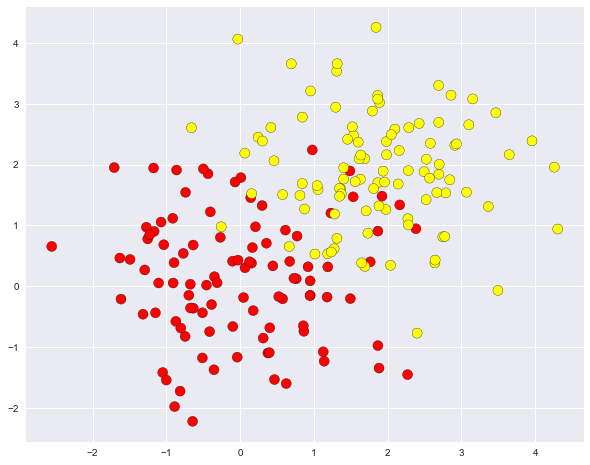

In [7]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolor='k')

**Попробуем разделить эти два класса, обучив дерево решений. Визуализируем полученную границу разделения класссов.**

(849, 886)


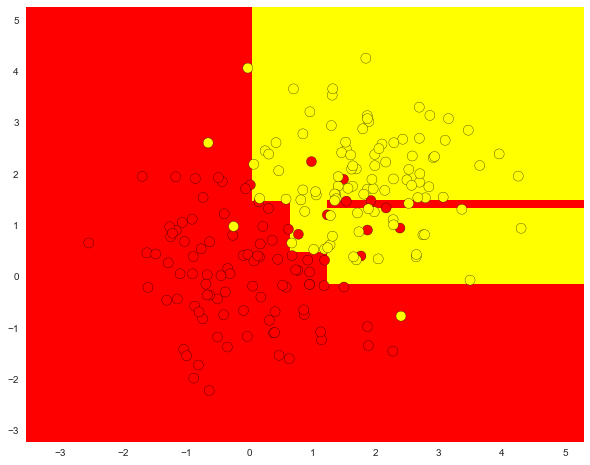

In [13]:
from sklearn.tree import DecisionTreeClassifier
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(train_data, train_labels)

xx, yy = get_grid(train_data)

print(xx.shape)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolor='k')

**Проведем ту же процедуру, но теперь предскажем вещественные вероятности принадлежности первому классу. 
Сторого говоря, это не вероятности, а нормированные числа объектов разных классов из одного листа дерева.
Например, если в каком-то листе оказалось 5 положительных объектов (с меткой 1) и 2 отрицательных (с меткой 0),
то вместо того, чтобы предсказывать метку 1 для всех объектов, которые попадут на этот лист, будет предсказываться
величина $\frac{5}{7}$.**

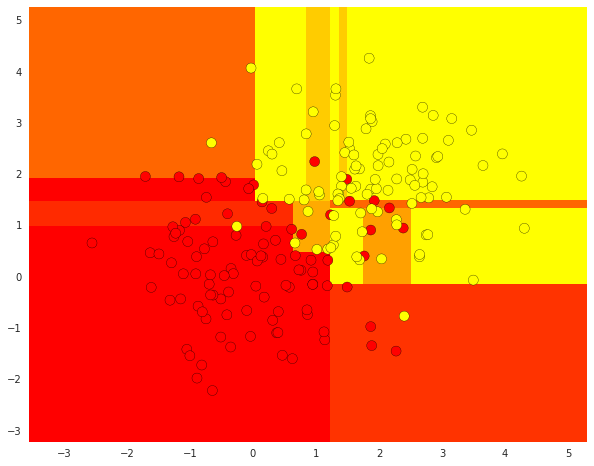

In [6]:
predicted_proba = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted_proba, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolor='k')

**Сгенерируем случайно распределенные тестовые данные.**

In [7]:
test_data = np.random.normal(size=(100, 2), loc = 1)
predicted = clf.predict(test_data)

**Отобразим их. Поскольку метки тестовых объектов неизвестны, нарисуем их серыми.**

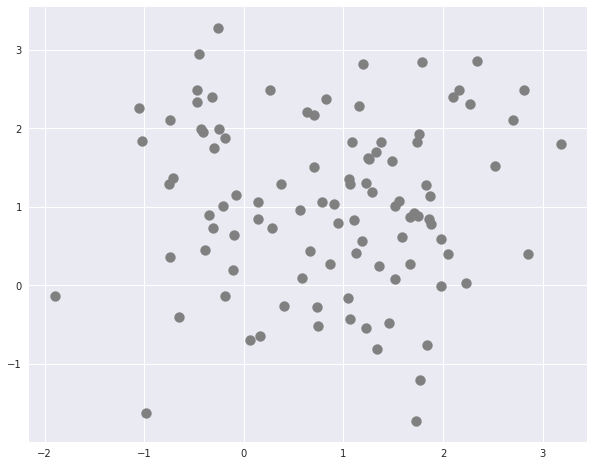

In [8]:
plt.scatter(test_data[:, 0], test_data[:, 1], c="gray", s=100)

**Посмотрим, как дерево решений классифицировало тестовые примеры. Для контраста используем другую цветовую гамму. Зеленым цветом обозначены тестовые объекты, которые были классифицированы построенным деревом решений как положительные (класс 1). Белым цветом соответственно обозначены тестовые объекты, для которых предсказана метка 0.**

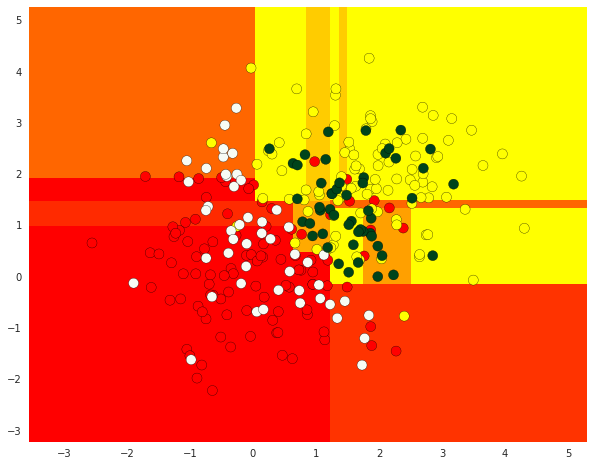

In [9]:
plt.pcolormesh(xx, yy, predicted_proba, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, cmap='autumn', edgecolor='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted, s=100, cmap='Greens', edgecolor='k')

# Дерево решений в задаче регрессии

В этом случае всё очень похоже, с той разницой, что мы будем пытаться уменьшить среднеквадратичную ошибку
$$\Large I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$\Large  c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

Тут дерево решений будет строить разделяющую поверхность, участки которой параллельны осям координат.

## Пример

Сгенерируем данные, распределенные вокруг функции $f(x) = e^{-x ^ 2} + 1.5 * e^{-(x - 2) ^ 2}$ c некоторым шумом.

In [10]:
n_train = 150        
n_test = 1000       
noise = 0.1


def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
        np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

In [11]:
from sklearn.tree import DecisionTreeRegressor
     
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)
d_predict = dtree.predict(X_test)

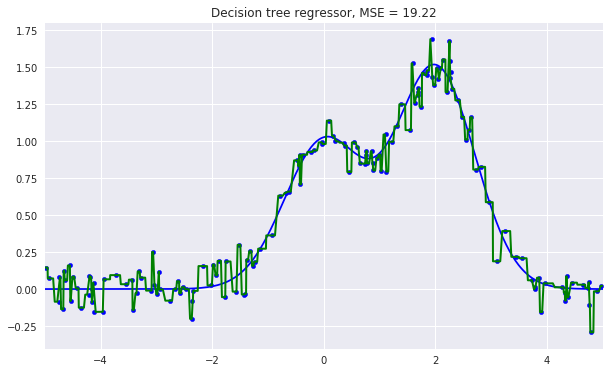

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - d_predict) ** 2))
plt.show()

# Визуализация деревьев в Scikit-learn

**Для этого понадобится специальная библиотека по работе с графами `graphviz`.**

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_train, iris_target = iris.data, iris.target

In [14]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(iris_train, iris_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [15]:
from sklearn.tree import export_graphviz
import sys
export_graphviz(tree, feature_names=['sl', 'sw', 'pl', 'pw'], out_file=sys.stdout)
# Далее вставляем вывод в форму на сайте http://www.webgraphviz.com/

digraph Tree {
node [shape=box] ;
0 [label="pl <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pw <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="pl <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 5 ;
6 [label="pl <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]"] ;
2 -> 6 ;
7 [label="gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]"] ;
6 -> 8 ;
}

In [16]:
export_graphviz(tree, feature_names=['sl', 'sw', 'pl', 'pw'], out_file='../../output/iris_tree.dot')
!dot -Tpng '../../output/iris_tree.dot' -o '../../img/iris_tree.png'

<img src="../../img/iris_tree.png">

**Если достаточно получить список классифицирующих правил, можно использовать код [отсюда](http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree)**

In [17]:
def get_rules(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print("if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print("}")
                else:
                        print("return " + str(value[node]))

        recurse(left, right, threshold, features, 0)

In [18]:
get_rules(tree, feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

if ( petal length (cm) <= 2.45000004768 ) {
return [[ 50.   0.   0.]]
} else {
if ( petal width (cm) <= 1.75 ) {
if ( petal length (cm) <= 4.94999980927 ) {
return [[  0.  47.   1.]]
} else {
return [[ 0.  2.  4.]]
}
} else {
if ( petal length (cm) <= 4.85000038147 ) {
return [[ 0.  1.  2.]]
} else {
return [[  0.   0.  43.]]
}
}
}


# Плюсы и минусы подхода

В этом разделе мы познакомились с самым простым и интуитивно понятным методом классификации, деревом решений, и посмотрели, как он используется в библиотеке Scikit-learn в задаче классификации. 
Пока мы не обсуждали, как оценивать качество классификации и как бороться с переобучением деревьев решений. 
Отметим плюсы и минусы данного подхода.

**Плюсы:**
 - Порождение четких правил классификации, понятных человеку, например, "если возраст < 25 и интерес к мотоциклам, отказать в кредите"
 - Деревья решений могут легко визуализироваться
 - Относительно быстрые процессы обучения и классификации
 - Малое число параметров модели 
 - Поддержка и числовых, и категориальных признаков
 
**Минусы:**
 - Разделяющая граница, построенная деревом решений, имеет свои ограничения (состоит из гиперкубов), и на практике дерево решений по качеству классификации уступает некоторым другим методам
 - Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением. Впрочем, переобучение - проблема всех методов машинного обучения
 - Нестабильность. Небольшие изменения в данных могут существенно изменять построенное дерево решений. С этой проблемой борются с помощью ансамблей деревьев решений (рассмотрим далее)
 - Проблема поиска оптимального дерева решений NP-полна, поэтому на практике используются эвристики типа жадного поиска признака с максимальным приростом информации, которые не гарантируют нахождения глобально оптимального дерева
 - Сложно поддерживаются пропуски в данных. Friedman оценил, что на поддержку пропусков в данных ушло 50% кода CART. 

### Ссылки

- Статья <a href="http://habrahabr.ru/post/171759/">"Энтропия и деревья принятия решений"</a>  на Хабрахабре (некоторые картинки взяты из нее)
- Статьи <a href="https://en.wikipedia.org/wiki/Decision_tree_learning">"Decision tree learning"</a>, <a href="https://ru.wikipedia.org/wiki/C4.5">"C4.5"</a> и <a href="https://ru.wikipedia.org/wiki/ID3_(%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC)">"ID3 (алгоритм)"</a> на Википедии 
- <a href="http://cis-linux1.temple.edu/~giorgio/cis587/readings/id3-c45.html">Статья</a> "Building Classification Models: ID3 and C4.5" 
- Use Case: Дерево решений (<a href="http://www.nytimes.com/imagepages/2008/04/16/us/20080416_OBAMA_GRAPHIC.html">нарисовано</a>) для предсказания итогов выборов президента США (когда Барак Обама победил Хилари Клинтон) 